In [1]:
import sys
sys.path.insert(0, '../..')

In [2]:
%load_ext autoreload
%autoreload 2
import edunn as nn
import numpy as np

# Clasificación con CNN

También podemos entrenar una red neuronal para clasificar las imágenes de dígitos escritos a mano del conjunto de datos de [MNIST](http://yann.lecun.com/exdb/mnist/). Este conjunto de datos es un clásico en el aprendizaje automático, y es un buen punto de partida para probar las redes neuronales convolucionales. Intentá probar agregando/quitando capas adicionales y variando los parámetros de las mismas.


In [3]:
x,y,classes=nn.datasets.load_classification("mnist")
# normalización de los datos
# x = (x-x.mean(axis=0))/x.std(axis=0)
n, din = x.shape
# calcular cantidad de clases
classes = y.max()+1
print("Tamaños de x e y:", x.shape,y.shape)

Tamaños de x e y: (1200, 784) (1200,)


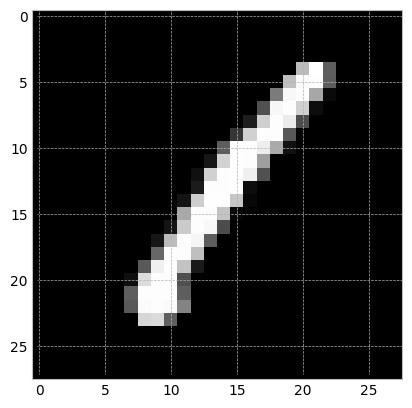

In [4]:
import matplotlib.pyplot as plt
plt.imshow(np.reshape(x[0],(28,28)),cmap="gray")

In [5]:
x = x.reshape(-1, 1, 28, 28)

In [6]:
def calculate_in_features(input_size, layers):
    output_size = input_size
    for layer in layers:
        output_size = (output_size - layer['kernel_size'] + 2*layer['padding']) // layer['stride'] + 1
        out_channels = layer['out_channels']
    in_features = output_size * output_size * out_channels
    return in_features

layers = [
    {'out_channels': 32,    'kernel_size': 3,   'stride': 2, 'padding': 1},
    {'out_channels': 64,    'kernel_size': 3,   'stride': 2, 'padding': 1},
]
input_size = x.shape[-1]
in_features = calculate_in_features(input_size, layers)
in_features

3136

In [7]:
hidden_dim=3
#Red con dos capas 
model = nn.Sequential([
    nn.Convolution2D(in_channels=1,     out_channels=32,    kernel_size=(3,3),      stride=2, padding=1),
    nn.ReLU(),
    nn.Convolution2D(in_channels=32,    out_channels=64,    kernel_size=(3,3),      stride=2, padding=1),
    nn.ReLU(),
    nn.Flatten(),
    nn.Dense(input_size=in_features,output_size=128,activation_name="relu"),
    nn.Dense(input_size=128,output_size=classes,activation_name="softmax"),
    ])

error = nn.MeanError(nn.CrossEntropyWithLabels())
optimizer = nn.GradientDescent(lr=0.1,epochs=5,batch_size=32)

In [8]:
# Algoritmo de optimización
history = optimizer.optimize(model,x,y,error)
nn.plot.plot_history(history,error_name=error.name)

optim. Sequential_0:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
print("Métricas del modelo:")
y_pred=model.forward(x)

In [ ]:
y_pred_labels=nn.utils.onehot2labels(y_pred)

In [ ]:
nn.metrics.classification_summary(y,y_pred_labels.astype(int))